Мы имеем датасет (средняя зарплата от средней стоимости дома). Изначально классов нет поэтому сначала придется классифицировать самим

Так как в дата сете рассмотрены не столько отдельные параметры одного дома дома, сколько средние параметры домов на определенной территории (насолько я понял), то описание параметров тоже будем обозначать в среднем



1.   longitude - долгота
2.   latitude - широта
3.   housing_median_age - средний возраст домов
4.   total_rooms - общая площадь
5.   total_bedrooms - общая площадь спален
6.   population - население
7.   households - домохозяйства
8.   median_income - доход
9.   median_house_value - стоимость дома
10.  ocean_proximity - близость до океана\залива



In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline              # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения


Костыль, чтобы разобраться с недоступными строчками в бд

In [2]:
def i_ne_mogy(arr):
  tmp = arr.to_numpy()
  tmp = pd.Series(tmp)
  return tmp


Немного посмотрим на наш массив

In [3]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


Выделяем категорию и идем дальше


In [5]:
data['ocean_proximity'] = data['ocean_proximity'].astype('category')

In [6]:
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)

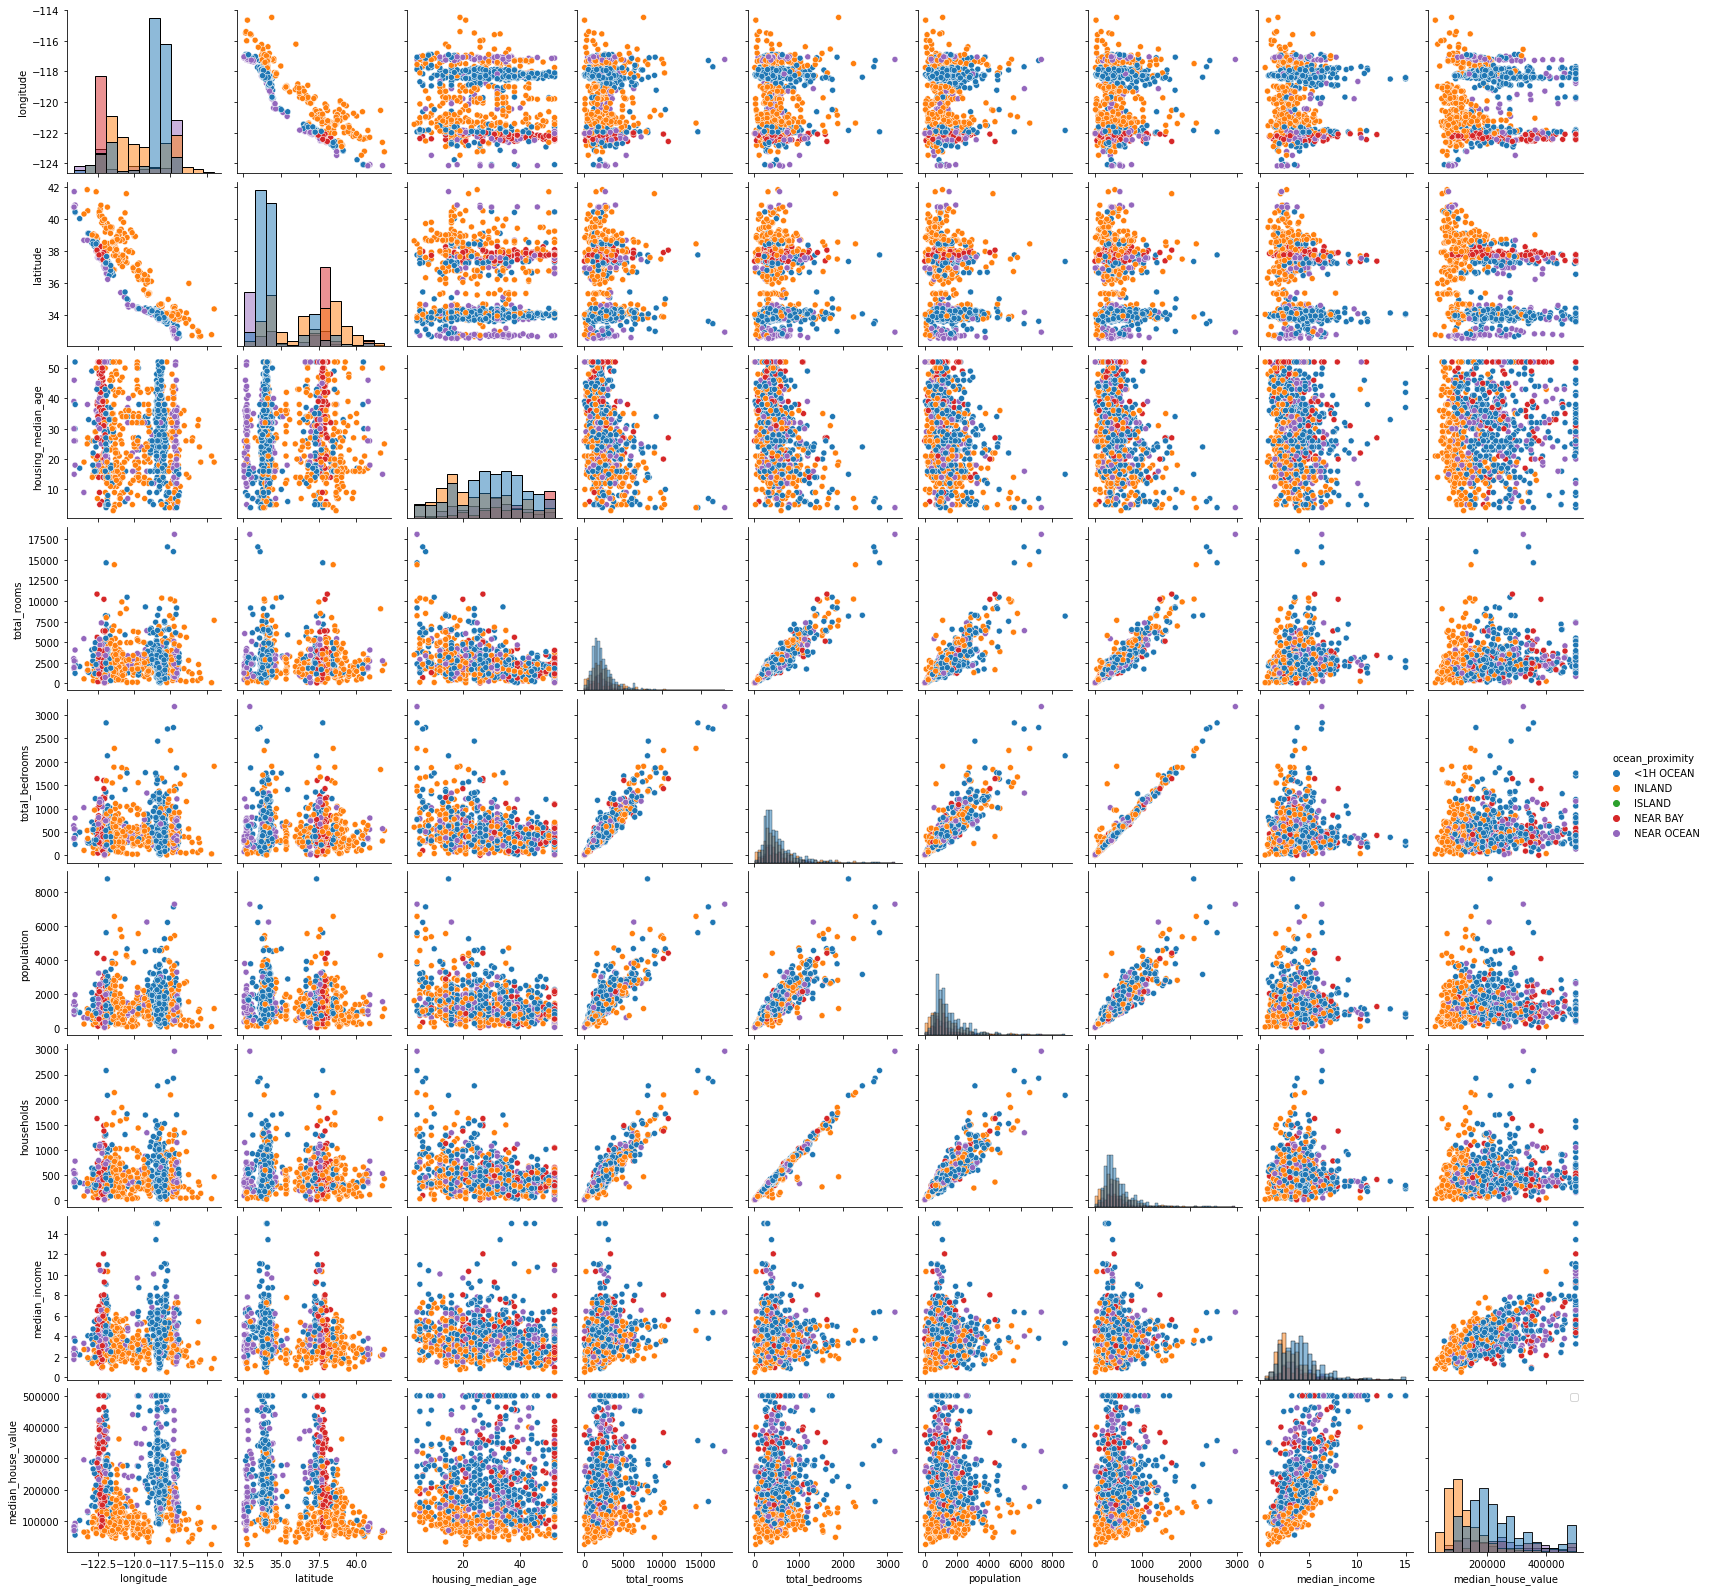

In [7]:
sns.pairplot(data.iloc[random_subset], hue = 'ocean_proximity', diag_kind='hist')
plt.legend()

Видна достаточно сильная корреляция между средним доходом и средней ценой дома.

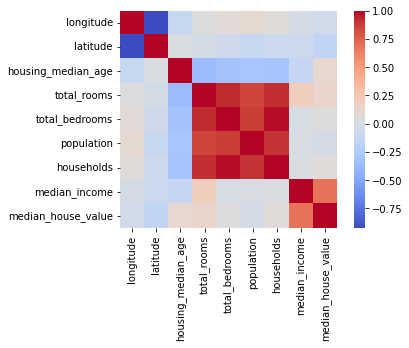

In [8]:
corr_mat = data.corr()
sns.heatmap(corr_mat, square=True, cmap='coolwarm')

In [9]:
corr_mat>0.5

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,True,False,False,False,False,False,False,False,False
latitude,False,True,False,False,False,False,False,False,False
housing_median_age,False,False,True,False,False,False,False,False,False
total_rooms,False,False,False,True,True,True,True,False,False
total_bedrooms,False,False,False,True,True,True,True,False,False
population,False,False,False,True,True,True,True,False,False
households,False,False,False,True,True,True,True,False,False
median_income,False,False,False,False,False,False,False,True,True
median_house_value,False,False,False,False,False,False,False,True,True


Далее пытаемся избавиться от дропов

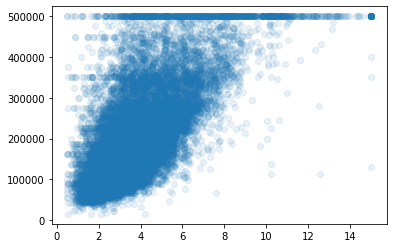

In [10]:
plt.scatter(data['median_income'], data['median_house_value'],alpha = 0.1)

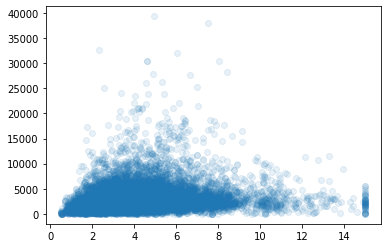

In [11]:
plt.scatter(data['median_income'], data['total_rooms'], alpha = 0.1)

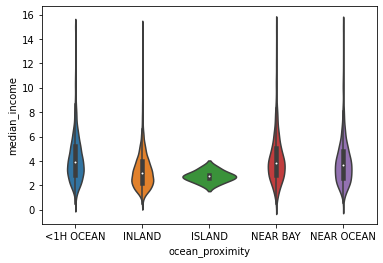

In [12]:
sns.violinplot(x="ocean_proximity", y="median_income", data=data)

In [13]:
data['median_income'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])
data['median_house_value'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])
rows_to_drop = data[
    (data['median_income'] < data['median_income'].quantile(0.005)) | (data['median_income'] > data['median_income'].quantile(0.995)) | 
    (data['median_house_value']  < data['median_house_value' ].quantile(0.005)) | (data['median_house_value']  > data['median_house_value' ].quantile(0.995))].index
data = data.drop(rows_to_drop)
data.shape

(20338, 10)

Использование костыля

In [14]:
longitude = i_ne_mogy(data['longitude'])
latitude = i_ne_mogy(data['latitude'])
housing_median_age = i_ne_mogy(data['housing_median_age'])
total_rooms = i_ne_mogy(data['total_rooms'])
total_bedrooms = i_ne_mogy(data['total_bedrooms'])
population = i_ne_mogy(data['population'])
households = i_ne_mogy(data['households'])
median_income = i_ne_mogy(data['median_income'])
median_house_value = i_ne_mogy(data['median_house_value'])
ocean_proximity = i_ne_mogy(data['ocean_proximity'])
print(len(longitude),len(latitude),len(housing_median_age),len(total_rooms),
      len(total_bedrooms),len(population),len(households),len(median_income),len(median_house_value),len(ocean_proximity))
data = pd.DataFrame({'latitude':latitude})
data['longitude'] = longitude
data['housing_median_age'] = housing_median_age
data['total_rooms'] = total_rooms
data['total_bedrooms'] = total_bedrooms
data['population'] = population
data['households'] = households
data['median_income'] = median_income
data['median_house_value'] = median_house_value
data['ocean_proximity'] = ocean_proximity
data.tail()

20338 20338 20338 20338 20338 20338 20338 20338 20338 20338


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20333,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20334,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20335,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20336,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20337,39.37,-121.24,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


Все, больше не используем костыли

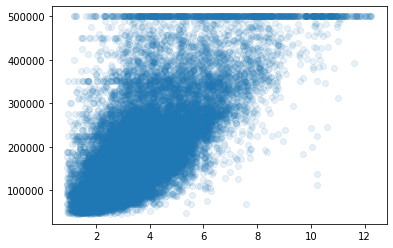

In [15]:
plt.scatter(data['median_income'], data['median_house_value'], alpha = 0.1)

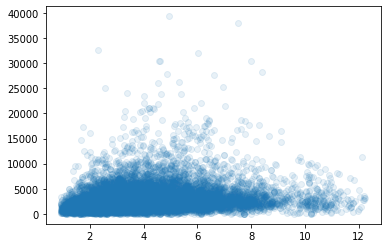

In [16]:
plt.scatter(data['median_income'], data['total_rooms'], alpha = 0.1)

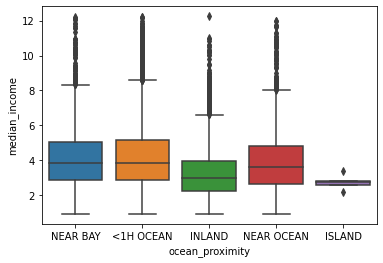

In [17]:
sns.boxplot(x="ocean_proximity", y="median_income", data=data)

Видна небольшая зависимость от того, где дом продается, выделяются дома, которые расположены "вне досягаемости до воды". Цена на них ниже

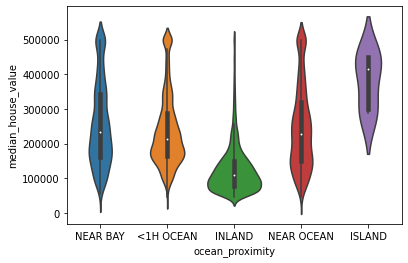

In [18]:
sns.violinplot(x="ocean_proximity", y="median_house_value", data=data)

In [19]:
data_new = data

Ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'])
data_new = pd.concat((data_new, Ocean_proximity_dummies), axis=1)

data_new = data_new.drop(['ocean_proximity'], axis=1)
data_new = data_new.drop(['longitude'], axis=1)
data_new = data_new.drop(['latitude'], axis=1)


In [20]:
tmp = data_new[data_new["INLAND"] == 1]
tmp = tmp.drop(['ISLAND'], axis=1)
tmp = tmp.drop(['NEAR BAY'], axis=1)
tmp = tmp.drop(['NEAR OCEAN'], axis=1)
tmp = tmp.drop(['<1H OCEAN'], axis=1)

In [21]:
random_subset = np.random.choice(np.arange(tmp.shape[0]), size=100, replace=False)

посмотрим о возможные корреляции

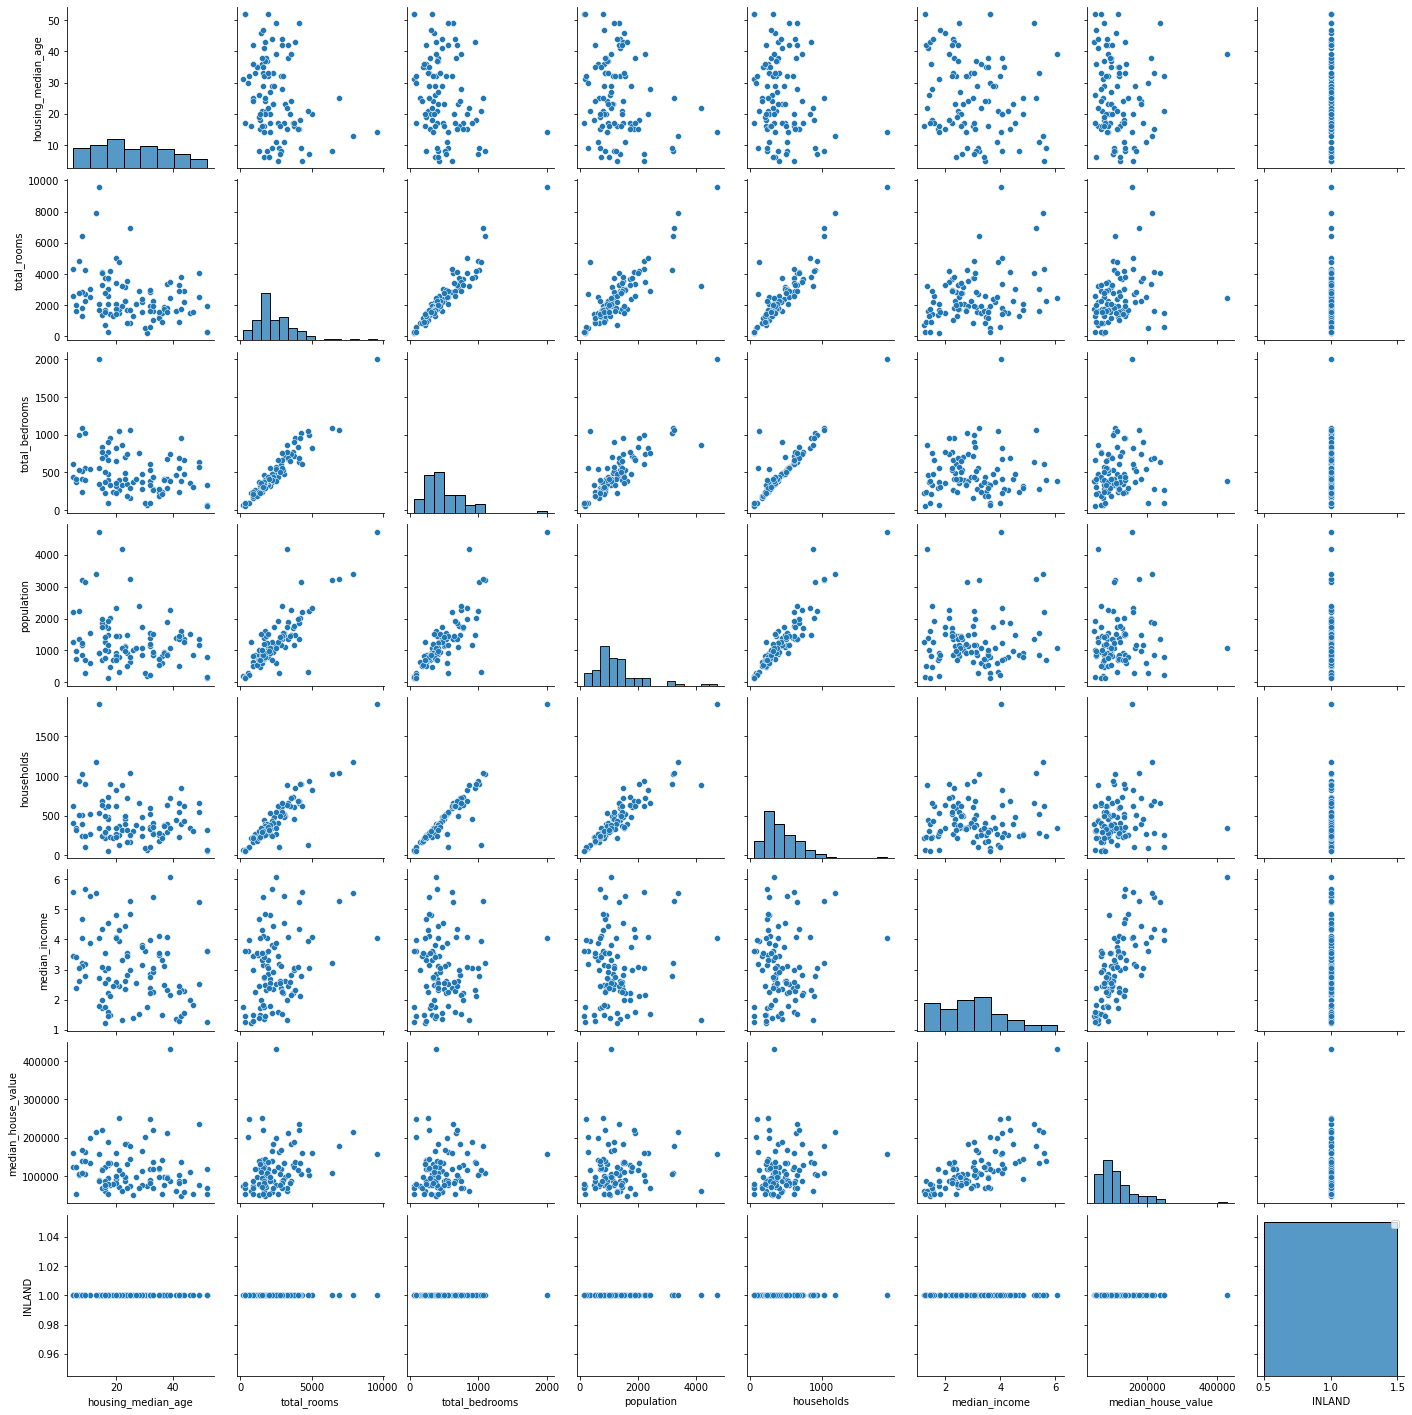

In [22]:

sns.pairplot(tmp.iloc[random_subset], diag_kind='hist')
plt.legend()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND
housing_median_age,True,False,False,False,False,False,False,False
total_rooms,False,True,True,True,True,False,False,False
total_bedrooms,False,True,True,True,True,False,False,False
population,False,True,True,True,True,False,False,False
households,False,True,True,True,True,False,False,False
median_income,False,False,False,False,False,True,True,False
median_house_value,False,False,False,False,False,True,True,False
INLAND,False,False,False,False,False,False,False,False


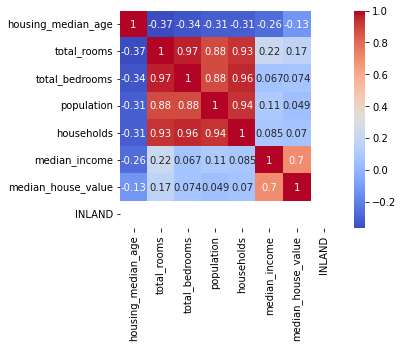

In [23]:
corr_mat = tmp.corr()
sns.heatmap(corr_mat, square=True, cmap='coolwarm',annot=True)
corr_mat > 0.5

Избавляемся от пустых значений

In [24]:
data_new.isna().sum() 

housing_median_age      0
total_rooms             0
total_bedrooms        205
population              0
households              0
median_income           0
median_house_value      0
<1H OCEAN               0
INLAND                  0
ISLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

In [25]:
data_new['total_bedrooms'].fillna(data_new['total_bedrooms'].mode().iloc[0], inplace=True)

In [26]:
data_new.isna().sum() 

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

Стандартизируем

In [27]:
data_stand = (data_new - data_new.mean(axis = 0))/data_new.std(axis = 0)

In [28]:
data_stand.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20338.000000,2.033800e+04,2.033800e+04,2.033800e+04,2.033800e+04,2.033800e+04,2.033800e+04,2.033800e+04,20338.000000,2.033800e+04,2.033800e+04,2.033800e+04
mean,0.000000,-8.978734e-17,-1.117975e-16,4.751392e-17,5.589873e-17,2.291848e-16,-3.353924e-17,-1.145924e-16,0.000000,1.397468e-18,-6.987341e-17,-2.235949e-17
std,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.196795,-1.213191e+00,-1.275869e+00,-1.261735e+00,-1.308616e+00,-1.671268e+00,-1.418800e+00,-8.940392e-01,-0.679077,-1.568099e-02,-3.529479e-01,-3.850374e-01
25%,-0.843328,-5.445286e-01,-5.810152e-01,-5.656597e-01,-5.764650e-01,-7.225214e-01,-7.552029e-01,-8.940392e-01,-0.679077,-1.568099e-02,-3.529479e-01,-3.850374e-01
50%,0.032444,-2.340290e-01,-2.478660e-01,-2.307744e-01,-2.365378e-01,-1.717476e-01,-2.326089e-01,-8.940392e-01,-0.679077,-1.568099e-02,-3.529479e-01,-3.850374e-01
75%,0.669370,2.332099e-01,2.566172e-01,2.641483e-01,2.733531e-01,5.104870e-01,5.058967e-01,1.118464e+00,1.472515,-1.568099e-02,-3.529479e-01,-3.850374e-01
max,1.863606,1.680633e+01,1.405613e+01,3.028246e+01,1.458952e+01,4.808145e+00,2.586588e+00,1.118464e+00,1.472515,6.376833e+01,2.833140e+00,2.597023e+00


In [29]:
data_stand

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.987833,-0.810802,-0.973655,-0.982332,-0.984378,2.563913,2.168856,-0.894039,-0.679077,-0.015681,2.833140,-0.385037
1,-0.604481,2.039378,1.351250,0.855889,1.661825,2.550297,1.339580,-0.894039,-0.679077,-0.015681,2.833140,-0.385037
2,1.863606,-0.541779,-0.828497,-0.828484,-0.851022,1.952995,1.283178,-0.894039,-0.679077,-0.015681,2.833140,-0.385037
3,1.863606,-0.630231,-0.721414,-0.773664,-0.741199,1.029408,1.188001,-0.894039,-0.679077,-0.015681,2.833140,-0.385037
4,1.863606,-0.468450,-0.614330,-0.767475,-0.636606,0.001350,1.195932,-0.894039,-0.679077,-0.015681,2.833140,-0.385037
...,...,...,...,...,...,...,...,...,...,...,...,...
20333,-0.286018,-0.451035,-0.390644,-0.519903,-0.450953,-1.306479,-1.131506,-0.894039,1.472515,-0.015681,-0.352948,-0.385037
20334,-0.843328,-0.894671,-0.923683,-0.952270,-1.015756,-0.736353,-1.140319,-0.894039,1.472515,-0.015681,-0.352948,-0.385037
20335,-0.922944,-0.181095,-0.126504,-0.376665,-0.181626,-1.226552,-1.006365,-0.894039,1.472515,-0.015681,-0.352948,-0.385037
20336,-0.843328,-0.361666,-0.307357,-0.611858,-0.401272,-1.130892,-1.073342,-0.894039,1.472515,-0.015681,-0.352948,-0.385037


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
housing_median_age,True,False,False,False,False,False,True,False,False,False,True,False
total_rooms,False,True,True,True,True,True,True,False,False,False,False,False
total_bedrooms,False,True,True,True,True,False,False,False,False,False,False,False
population,False,True,True,True,True,False,False,False,False,False,False,False
households,False,True,True,True,True,False,False,False,False,False,False,False
median_income,False,True,False,False,False,True,True,True,False,False,False,False
median_house_value,True,True,False,False,False,True,True,True,False,False,True,True
<1H OCEAN,False,False,False,False,False,True,True,True,False,False,False,False
INLAND,False,False,False,False,False,False,False,False,True,False,False,False
ISLAND,False,False,False,False,False,False,False,False,False,True,False,False


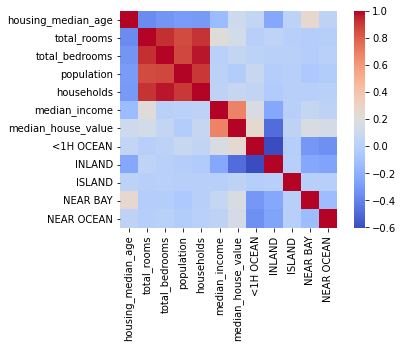

In [30]:
corr_mat = data_stand.corr()
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
corr_mat > 0.1

Будем использовать все входные признаки кроме 'INLAND', 'NEAR BAY', 'NEAR OCEAN'



In [31]:
data_stand.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value', '<1H OCEAN',
       'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [32]:
X = data_stand.drop(['median_income', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'], axis=1)
y = data_new['median_income']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(15253, 5085)

Линейная регрессия

In [34]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_train_predict = lr_model.predict(X_train)
y_test_predict  = lr_model.predict(X_test)

In [36]:
lr_model.coef_

array([-0.28864621,  1.84844422, -1.52029149,  0.07094098, -0.39942862,
        1.06594706,  0.07871689, -0.03416235])

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

(1.010027586870723, 1.0308910556697153, 0.6684668101385769, 0.665226429992259)

Результаты конечно не радуют, но чем богаты

In [38]:
lr_model.score(X_train, y_train) 

0.6684668101385769

Делаем из столбца median_income булевый столбец
Пусть если значение было > 0 то это класс выше среднего, остальные ниже среднего

In [39]:
for i in range(len(data_stand)):
  if data_stand['median_income'][i]>0:
    data_stand['median_income'][i] = 1
  else :
    data_stand['median_income'][i] = 0
data_stand

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.987833,-0.810802,-0.973655,-0.982332,-0.984378,1.0,2.168856,-0.894039,-0.679077,-0.015681,2.833140,-0.385037
1,-0.604481,2.039378,1.351250,0.855889,1.661825,1.0,1.339580,-0.894039,-0.679077,-0.015681,2.833140,-0.385037
2,1.863606,-0.541779,-0.828497,-0.828484,-0.851022,1.0,1.283178,-0.894039,-0.679077,-0.015681,2.833140,-0.385037
3,1.863606,-0.630231,-0.721414,-0.773664,-0.741199,1.0,1.188001,-0.894039,-0.679077,-0.015681,2.833140,-0.385037
4,1.863606,-0.468450,-0.614330,-0.767475,-0.636606,1.0,1.195932,-0.894039,-0.679077,-0.015681,2.833140,-0.385037
...,...,...,...,...,...,...,...,...,...,...,...,...
20333,-0.286018,-0.451035,-0.390644,-0.519903,-0.450953,0.0,-1.131506,-0.894039,1.472515,-0.015681,-0.352948,-0.385037
20334,-0.843328,-0.894671,-0.923683,-0.952270,-1.015756,0.0,-1.140319,-0.894039,1.472515,-0.015681,-0.352948,-0.385037
20335,-0.922944,-0.181095,-0.126504,-0.376665,-0.181626,0.0,-1.006365,-0.894039,1.472515,-0.015681,-0.352948,-0.385037
20336,-0.843328,-0.361666,-0.307357,-0.611858,-0.401272,0.0,-1.073342,-0.894039,1.472515,-0.015681,-0.352948,-0.385037


Классифицируем значения с помощью к ближайших


In [40]:
y = data_stand['median_income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

y_train

from sklearn.neighbors import KNeighborsClassifier


In [41]:
k_neigh = KNeighborsClassifier(n_neighbors=2)
k_neigh.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=2)

In [42]:
from sklearn.metrics import confusion_matrix

Посмотрим путанницу на трейне

In [43]:
pred_test = k_neigh.predict(X_train)
confusion_matrix(y_train,pred_test)

array([[8744,    0],
       [1454, 5055]])

Не очень хорошо
Но посмотрим что выдаст трейн и его ошибку

In [44]:
pred_test = k_neigh.predict(X_test)
confusion_matrix(y_test,pred_test)

array([[2675,  280],
       [ 756, 1374]])

In [45]:
err_test  = np.mean(y_test  != pred_test)
err_test

0.20373647984267454

Не хорошо. Попробуем найти оптимальный параметр для k ближайших

In [46]:
error_rates = []
for i in np.arange(1, 30):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(X_train, y_train)
    new_predictions = new_model.predict(X_test)
    error_rates.append(np.mean(new_predictions != y_test))

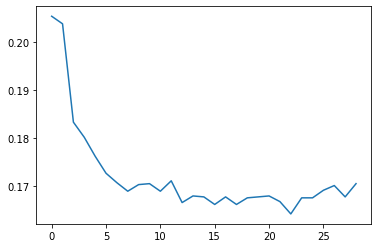

In [47]:
plt.plot(error_rates)

Теперь с этим параметром проводим аналогичные тесты

In [48]:
min(error_rates)
ind = error_rates.index(min(error_rates))

new_model = KNeighborsClassifier(n_neighbors = ind)
new_model.fit(X_train, y_train)
new_predictions = new_model.predict(X_train)
confusion_matrix(y_train,new_predictions)


array([[7697, 1047],
       [1244, 5265]])

In [49]:
err_test  = np.mean(y_train  != new_predictions)
err_test

0.15019996066347605

In [50]:
new_predictions = new_model.predict(X_test)
confusion_matrix(y_test,new_predictions)

array([[2547,  408],
       [ 440, 1690]])

In [51]:
err_test  = np.mean(y_test  != new_predictions)
err_test

0.16676499508357914

Результаты стали лучше, но все же хотелось большего результата.
возможно метод k ближайших не подходит для решения данной задачи

Логистическая регрессия


In [52]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [53]:
y_test_predict = log.predict(X_test)
y_train_predict = log.predict(X_train)

In [54]:
err_train  = np.mean(y_train  != y_train_predict)
err_train

0.1501343997902052

In [55]:
confusion_matrix(y_train, y_train_predict)

array([[7883,  861],
       [1429, 5080]])

In [56]:
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.15555555555555556

In [57]:
confusion_matrix(y_test, y_test_predict)

array([[2649,  306],
       [ 485, 1645]])

Результат практически аналогичный k ближайшим, но все же получше
